# **Klasifikasi Mutu Padi Organik**
****

---



## **Domain Proyek**

Beras merupakan salah satu bahan pokok paling penting di dunia untuk konsumsi manusia yang berasal dari padi. Di negara negara asia yang penduduknya padat, khususnya Bangladesh, Myanmar, Kamboja, Cina, Indonesia, Korea, laos Filipina, Sri langka, thailand dan vietnam, beras juga merupakan salah satu makanan pokok. Sebanyak 75 % masukan harian masyarakat di negara-negara asia tersebut berasal dari beras. Lebih dari 50 % penduduk dunia tergantung pada beras sebagai sumber kalori utama(Resita wahyu dianti, 2010)

Padi organik juga memiliki gizi yang cukup tinggi untuk di konsumsi oleh masyarakat. Pertumbuhan yang sangat pesat dari akumulasi data mutu padi organik dari seorang expert telah menciptakan kondisi kaya akan data tapi minim informasi. Jika mutu padi organik diketahui maka pihak dinas pertanian dapat melakukan penentuan harga yang sesuai dengan mutu dan juga meningkatkan kepercayaan mitra yang berkerja sama dengan pihak dinas pertanian. Oleh karena itu maka di pandang perlu untuk melakukan sebuah penelitian dalam mencari pola dari mutu padi organik dengan menggunakan machine learning dengan tujuan agar pengklasifikasian tidak lagi sekedar hanya menggunakan perkiraan semata tapi menggunakan data pengalaman dari seorang expert yang sudah di extrak dan menjadi acuan utama dalam menentukan klasifikasi mutu dari sebuah padi organik. 

## **Business understanding**

Dinas pertanian memiliki data terkait padi organik, namun data tersebut
masih sulit untuk melihat pola mutu padi organik secara menyeluruh, untuk kepentingan pengembangan selanjutnya maka dibutuhkan sebuah model yang bisa mengklasifikasi data mutu padi organik di Dinas pertanian,
hal ini diperlukan agar data yang ada bisa lebih bermanfaat lagi bukan hanya sekedar
tumpukan data yang minim informasi.

### Problem Statements
*   Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap mutu padi organik?
*   Apa mutu padi organik dengan karakteristik atau fitur tertentu?  

### Goals
*   Mengetahui fitur yang paling berkorelasi dengan mutu padi oragnik.
*   Membuat model machine learning yang dapat memprediksi mutu padi organik seakurat mungkin berdasarkan fitur-fitur yang ada.



### Metodologi
Prediksi mutu/kualitas adalah tujuan yang ingin dicapai. Seperti yang kita tahu, mutu merupakan variabel diskrit. Dalam predictive analytics, saat membuat prediksi variabel diskrit artinya Anda sedang menyelesaikan permasalahan klasifikasi. Oleh karena itu, metodologi pada proyek ini adalah: membangun model klasifikasi dengan mutu padi organik sebagai target.

### Metrik
Metrik digunakan untuk mengevaluasi seberapa baik model Anda dalam memprediksi mutu. Untuk kasus klasifikasi, metrik yang biasanya digunakan adalah accuracy.

## **Data understanding**

Data yang Anda gunakan pada proyek kali ini adalah Data Mutu Padi Organik yang dapat  diunduh di [Drive saya](https://drive.google.com/file/d/1AnABSK_LiYWYobo4eD1fCxiqM63GjYQv/view?usp=sharing).

Dataset ini memiliki **4.952** sampel padi dengan berbagai karakteristik dan grade mutu. Karakteristik yang dimaksud di sini adalah fitur non-numerik seperti varietas, warna, rasa, teknik, musim, dan penyakit, serta fitur numerik seperti Panjang, Besar, dan PH.

### Data Loading

Supaya isi dataset lebih mudah dipahami, kita perlu melakukan proses loading data terlebih dahulu. Dataset yang akan kita gunakan bernama Data Mutu Padi Organik.csv.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
# Baca file dataset
padi = pd.read_csv('/content/drive/MyDrive/Data Mutu Padi Organik.csv')
padi.head()

,No.,Varietas,Panjang,Besar,Warna,Rasa,Teknik,Musim,Penyakit,PH,Grade Mutu
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,panda wangi,6.3,1.2,putih,sangat pulen,Jajar Legowo,Hujan,Burung,2.0,Grade D
2,2.0,ciheran,7.2,2.3,putih,pulen,Jajar Legowo,Hujan,penggerek batang,2.0,Grade C
3,3.0,mi kongga,6.1,3.3,putih,sangat pulen,SRI,Hujan,wereng coklat,2.0,Grade D
4,4.0,IR 64,6.1,4.2,putih,pulen,SRI,Hujan,wereng hijau,2.0,Grade B


Pada dataset tersebut, terdapat baris data kosong dan kolom 'No.' yang tidak diperlukan yang bisa kita buang.

In [8]:
padi = padi.drop(0) # Buang baris yang tidak diperlukan
padi.drop('No.', axis=1, inplace=True) # Buang kolom yang tidak diperlukan
padi

,Varietas,Panjang,Besar,Warna,Rasa,Teknik,Musim,Penyakit,PH,Grade Mutu
1,panda wangi,6.3,1.2,putih,sangat pulen,Jajar Legowo,Hujan,Burung,2.0,Grade D
2,ciheran,7.2,2.3,putih,pulen,Jajar Legowo,Hujan,penggerek batang,2.0,Grade C
3,mi kongga,6.1,3.3,putih,sangat pulen,SRI,Hujan,wereng coklat,2.0,Grade D
4,IR 64,6.1,4.2,putih,pulen,SRI,Hujan,wereng hijau,2.0,Grade B
5,Beras Merah,7.3,5.1,merah,sangat pulen,Jajar Legowo,Hujan,tikus,2.0,Grade C
...,...,...,...,...,...,...,...,...,...,...
4948,IR 64,7.2,4.2,putih,pulen,SRI,Hujan,wereng coklat,2.0,Grade D
4949,Beras Merah,6.1,5.3,merah,sangat pulen,Jajar Legowo,Hujan,wereng hijau,2.0,Grade B
4950,Beras Hitam,7.4,6.2,hitam,pulen,Jajar Legowo,Hujan,tikus,2.0,Grade C
4951,panda wangi,6.2,1.2,putih,sangat pulen,SRI,Kemarau,Burung,3.0,Grade C


Output kode di atas memberikan informasi sebagai berikut:

*   Ada 4.952 baris (records atau jumlah pengamatan) dalam dataset.
*   Terdapat 10 kolom yaitu: varietas, panjang,	besar,	warna,	rasa,	teknik,	musim,	penyakit,	PH, dan	grade mutu.

### Exploratory Data Analysis - Deskripsi Variabel

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

Secara umum, Anda dapat melakukan proses EDA untuk menjawab beberapa pertanyaan berikut:
*   Apa saja jenis variabel pada dataset?
*   Apakah ada missing value?
*   Bagaimana distribusi variabel dalam dataset?

Dalam menjawab pertanyaan-pertanyaan di atas, Anda perlu melakukan beberapa hal pada data.

In [9]:
padi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4952 entries, 1 to 4952
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Varietas    4952 non-null   object 
 1   Panjang     4952 non-null   float64
 2   Besar       4952 non-null   float64
 3   Warna       4952 non-null   object 
 4   Rasa        4952 non-null   object 
 5   Teknik      4952 non-null   object 
 6   Musim       4952 non-null   object 
 7   Penyakit    4952 non-null   object 
 8   PH          4952 non-null   float64
 9   Grade Mutu  4952 non-null   object 
dtypes: float64(3), object(7)
memory usage: 425.6+ KB


Dari output terlihat bahwa:
*   Terdapat 7 kolom dengan tipe object, 6 diantaranya yaitu: varietas, warna, rasa, teknik, musim, dan penyakit. Kolom ini merupakan categorical features (fitur non-numerik). satu lainnya adalah grade mutu yang merupakan target fitur kita.
*   Terdapat 3 kolom numerik dengan tipe data float64 yaitu: panjang, bentuk, dan ph. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.

In [10]:
padi.describe()

,Panjang,Besar,PH
count,4952.000000,4952.000000,4952.000000
mean,6.798183,3.676292,3.497981
std,0.506038,1.739016,1.118506
min,6.000000,1.100000,2.000000
25%,6.300000,2.200000,2.000000
50%,6.700000,3.300000,3.000000
75%,7.300000,5.200000,4.000000
max,7.800000,6.500000,5.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom. 
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.

### Exploratory Data Analysis - Menangani Missing Value dan Outliers

Dari hasil fungsi describe(), nilai minimum untuk selutuh kolom tidak ada yang bernilai 0. Hal tersebut mengindikasikan tidak ada missing value pada dataset.

Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier. Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya. 

Ada beberapa teknik untuk menangani outliers, antara lain:
*   Hypothesis Testing
*   Z-score method
*   IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method. 


1. Fitur Panjang

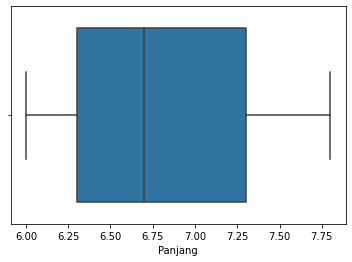

In [11]:
import seaborn as sns
sns.boxplot(x=padi['Panjang'])

2. Fitur Besar

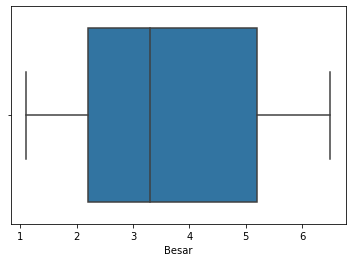

In [12]:
sns.boxplot(x=padi['Besar'])

3. Fitur PH

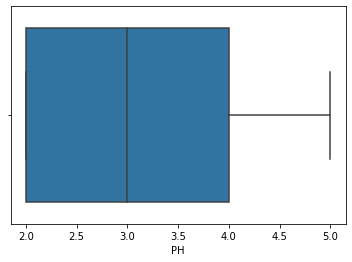

In [13]:
sns.boxplot(x=padi['PH'])

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas tidak terdapat outliers. Untuk itu kita tidak perlu melakukan penangan terhadap outlier. 

### Exploratory Data Analysis - Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [14]:
numerical_features = ['Panjang', 'Besar', 'PH']
categorical_features = ['Varietas', 'Warna', 'Rasa', 'Teknik', 'Musim', 'Penyakit', 'Grade Mutu']

**Categorical Features**
1. Fitur Varietas

             jumlah sampel  persentase
panda wangi            826        16.7
ciheran                826        16.7
mi kongga              825        16.7
IR 64                  825        16.7
Beras Merah            825        16.7
Beras Hitam            825        16.7


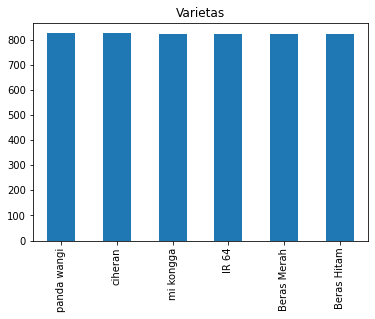

In [15]:
feature = categorical_features[0]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari grafik di atas, dapat kita simpulkan bahwa semua varietas meniliki jumlah yang merata di setiap kategorinya.

2. Fitur Warna

        jumlah sampel  persentase
putih            2889        58.3
merah             825        16.7
hitam             825        16.7
coklat            413         8.3


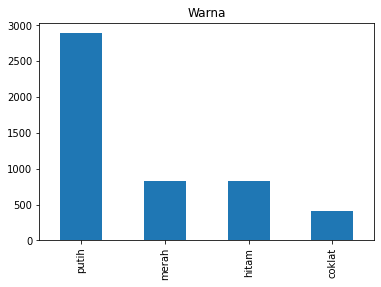

In [16]:
feature = categorical_features[1]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari data persentase dapat kita simpulkan bahwa lebih dari 50% sampel merupakan padi organik dengan warna putih.

3. Fitur Rasa

              jumlah sampel  persentase
sangat pulen           2476        50.0
pulen                  2476        50.0


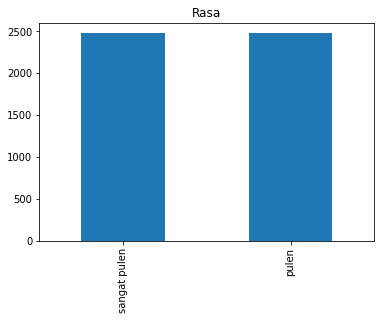

In [17]:
feature = categorical_features[2]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari grafik di atas, dapat kita simpulkan bahwa semua rasa meniliki jumlah yang merata di setiap kategorinya.

4. Fitur Teknik

              jumlah sampel  persentase
Jajar Legowo           2476        50.0
SRI                    2476        50.0


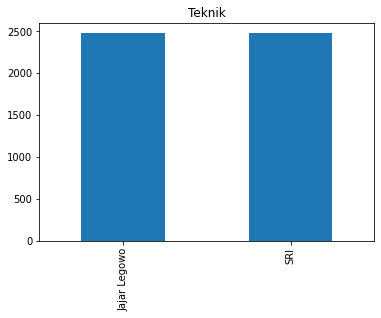

In [18]:
feature = categorical_features[3]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari grafik di atas, dapat kita simpulkan bahwa semua teknik meniliki jumlah yang merata di setiap kategorinya.

5. Fitur Musim

         jumlah sampel  persentase
Hujan             2478        50.0
Kemarau           2474        50.0


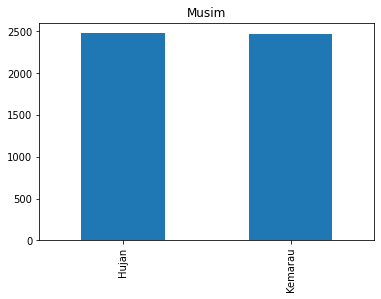

In [19]:
feature = categorical_features[4]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari grafik di atas, dapat kita simpulkan bahwa semua musim meniliki jumlah yang merata di setiap kategorinya.

6. Penyakit

                  jumlah sampel  persentase
Burung                      991        20.0
penggerek batang            991        20.0
wereng coklat               990        20.0
wereng hijau                990        20.0
tikus                       990        20.0


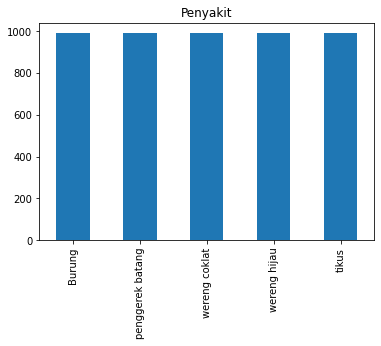

In [20]:
feature = categorical_features[5]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari grafik di atas, dapat kita simpulkan bahwa semua penyakit meniliki jumlah yang merata di setiap kategorinya.

7. Grade Mutu

         jumlah sampel  persentase
Grade C           2392        48.3
Grade B           1609        32.5
Grade D            869        17.5
Grade A             82         1.7


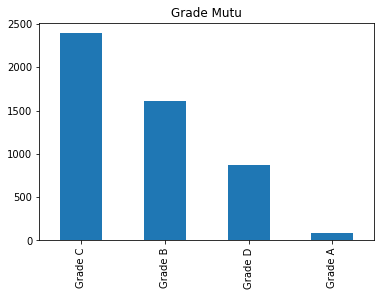

In [21]:
feature = categorical_features[6]
count = padi[feature].value_counts()
percent = 100*padi[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari data persentase dapat kita simpulkan bahwa lebih dari 70% sampel merupakan padi organik tipe grade sedang, yaitu grade B dan C.

**Numerical Features**

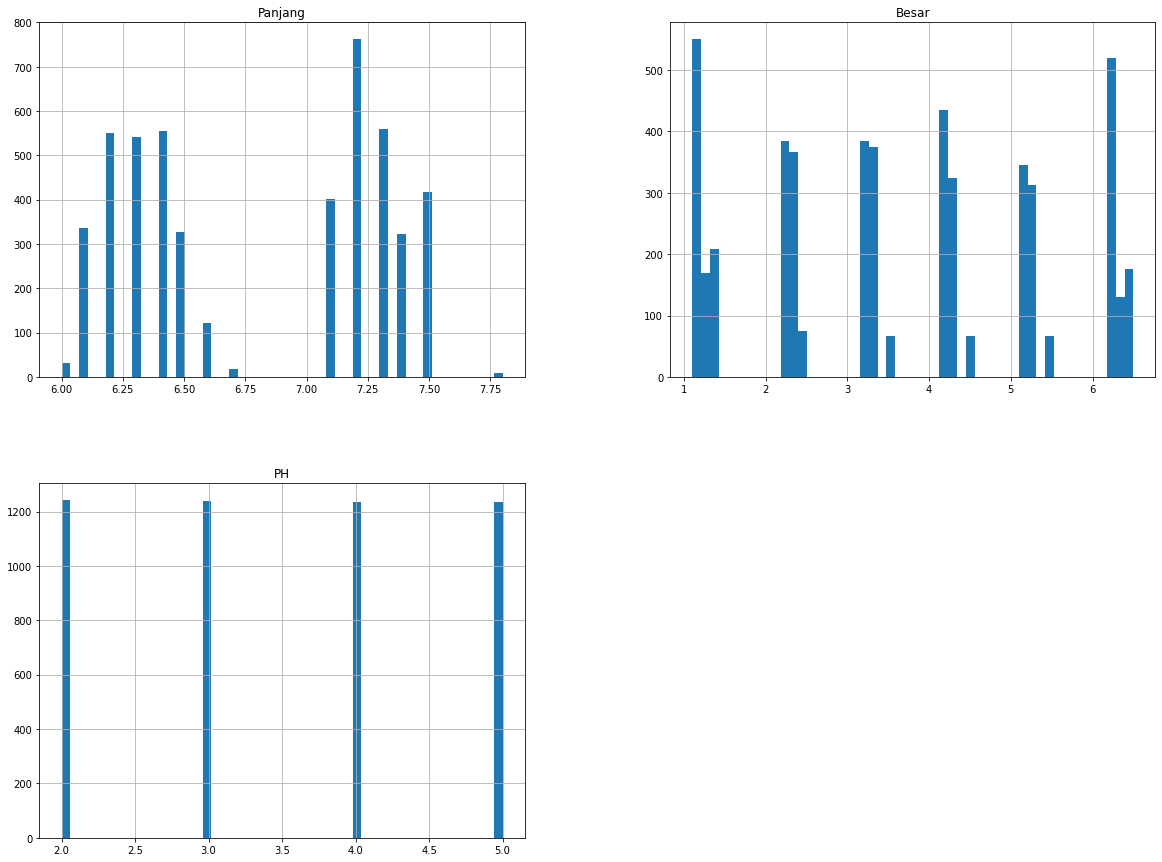

In [24]:
padi.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram di atas, kita bisa memperoleh beberapa informasi, antara lain:
* Panjang padi organik terbagi dalam 2 pusat, yaitu antara rentang 6.00-6.70 dan rentang 7.10-7.50.
* Besar padi organik juga bervariasi dalam rentang 1 hingga 7.
* Setengah harga berlian bernilai di bawah 2500.
* Untuk PH padi organik tersebar merata pada 2.0, 3.0, 4.0, dan 5.0..


## **Data preparation**

### Encoding Data Kategori

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Sebagai langkah awal, kita akan bagi data menjadi fitur (x) dan target (y) karena penangan encoding terhadap data kategorinya berbeda.

In [25]:
x = padi.iloc[:,:-1].values
y = padi.iloc[:,-1].values

In [26]:
# One hot encoding
crt = ColumnTransformer(transformers=[("encoder", OneHotEncoder(),[0,3,4,5,6,7])], remainder="passthrough")
x = np.array(crt.fit_transform(x))
print(x)


[[0.0 0.0 0.0 ... 6.3 1.2 2.0]
 [0.0 0.0 0.0 ... 7.2 2.3 2.0]
 [0.0 0.0 0.0 ... 6.1 3.3 2.0]
 ...
 [1.0 0.0 0.0 ... 7.4 6.2 2.0]
 [0.0 0.0 0.0 ... 6.2 1.2 3.0]
 [0.0 0.0 0.0 ... 6.4 2.3 3.0]]


In [27]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[3 2 3 ... 2 2 3]


### Pembagian dataset dengan fungsi train_test_split dari library sklearn

Ketahuilah bahwa setiap transformasi yang kita lakukan pada data juga merupakan bagian dari model. Karena data uji (test set) berperan sebagai data baru, kita perlu melakukan semua proses transformasi dalam data latih. Inilah alasan mengapa langkah awal adalah membagi dataset sebelum melakukan transformasi apa pun. Tujuannya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih. 

Proses scaling pada seluruh dataset membuat model memiliki informasi mengenai distribusi pada data uji. Informasi tentang data uji (yang seharusnya tidak dilihat oleh model) turut diikutsertakan dalam proses transformasi data latih. Oleh karena itu, kita akan melakukan proses scaling secara terpisah antara data latih dan data uji. 

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x, y , test_size=0.25, random_state=123)
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 4952
Total # of sample in train dataset: 3714
Total # of sample in test dataset: 1238


### Standarisasi

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)

[[-0.45024461 -0.45024461 -0.44287161 ...  1.38328267 -1.30938127
   1.33294366]
 [-0.45024461 -0.45024461 -0.44287161 ... -0.98523483 -0.27722915
   1.33294366]
 [-0.45024461 -0.45024461 -0.44287161 ... -0.59048192 -0.21988737
  -1.35513928]
 ...
 [-0.45024461 -0.45024461 -0.44287161 ... -1.18261129 -0.21988737
  -1.35513928]
 [-0.45024461  2.22101494 -0.44287161 ... -1.37998775  0.86960653
   1.33294366]
 [-0.45024461 -0.45024461 -0.44287161 ... -0.78785838 -1.48140662
  -0.45911163]]


## **Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. 

Siapkan data frame untuk analisis ketiga model tersebut lebih dahulu.

In [30]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_acc', 'test_acc'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbor

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. 

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
 
models.loc['train_acc','knn'] = accuracy_score(y_pred = knn.predict(x_train), y_true=y_train)

Meskipun algoritma KNN mudah dipahami dan digunakan, ia memiliki kekurangan jika dihadapkan pada jumlah fitur atau dimensi yang besar.

### Random Forest

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian.

Ada dua teknik pendekatan dalam membuat model ensemble, yaitu bagging dan boosting. Jangan bingung dulu dengan istilah ini ya. Kita akan bahas satu per satu. 

Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random.

In [32]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
 
# buat model prediksi
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(x_train, y_train)
 
models.loc['train_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(x_train), y_true=y_train)  

### Boosting Algorithm

Sebagai model ensemble, keduanya terdiri dari beberapa model yang bekerja secara bersama-sama. Pada teknik bagging, setiap model dilatih secara paralel. Sedangkan, pada teknik boosting, model dilatih secara berurutan atau dalam proses yang iteratif. 

Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner).

In [33]:
from sklearn.ensemble import AdaBoostClassifier
 
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)                             
boosting.fit(x_train, y_train)
models.loc['train_mse','Boosting'] = accuracy_score(y_pred=boosting.predict(x_train), y_true=y_train)

## **Evaluation**

Metrik yang akan kita gunakan pada prediksi ini adalah accuracy. Namun, sebelum menghitung nilai accuracy dalam model, kita perlu melakukan proses scaling fitur numerik pada data uji.

In [34]:
x_test  = sc.fit_transform(x_test)
print(x_test)

[[-0.43764177  2.28497386 -0.4597285  ... -0.98262314  0.89666916
  -1.2939003 ]
 [ 2.28497386 -0.43764177 -0.4597285  ...  1.39836681  1.47694956
   1.37436495]
 [-0.43764177 -0.43764177 -0.4597285  ...  0.80311932 -0.08980753
  -0.40447855]
 ...
 [-0.43764177 -0.43764177  2.17519688 ... -0.98262314  0.31638875
  -1.2939003 ]
 [-0.43764177  2.28497386 -0.4597285  ...  0.60470349  0.9546972
   1.37436495]
 [-0.43764177  2.28497386 -0.4597285  ... -0.78420731  0.83864112
  -1.2939003 ]]


In [35]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
acc = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    acc.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(x_train)) 
    acc.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(x_test))
 
# Panggil mse
acc

,train,test
KNN,0.999731,1.0
RF,1.0,1.0
Boosting,0.347065,0.324717


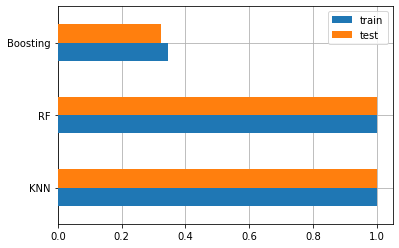

In [36]:
fig, ax = plt.subplots()
acc.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari output di atas, terlihat bahwa, model **Random Forest (RF)** memberikan nilai accuracy yang paling tinggi. Sedangkan model dengan algoritma Boosting memiliki accuracy yang paling kecil (berdasarkan grafik, angkanya di dibawah 0.4 atau 40%). Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi mutu padi organik.